In [162]:
# from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot  as plt

# X, y = make_classification()
X, y = load_iris(return_X_y=True)
X = X[:100]
y = y[:100]
# print(X.shape, X)
# print(y.shape, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# theta = np.random.randn(1, 20)
theta = np.random.randn(1, 4)
lr = 0.0001
epochs = 300
bias = 0

# print(theta.shape, X_train.shape)
# print(y_train.shape, y_train)


def forward(X, y, theta):
    z = np.dot(theta, X.T) + bias
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat


def loss(y, y_hat):
    e = 1e-8
    return -y * np.log(y_hat + e) + (1 - y) * np.log(1 - y_hat + e)


def calc_gradient(theta, X, y_hat, y, m=X.shape[-1]):
    delta_theta = np.dot(y_hat - y, X) / m
    delta_bias = np.mean(y_hat - y)
    return delta_theta, delta_bias


loss_val_record = []
acc_record = []

for i in range(epochs):
    """模型训练"""
    y_hat = forward(theta=theta, X=X_train, y=y_train)
    loss_val = loss(y_train, y_hat)
    loss_val_record.append(np.mean(loss_val))
    delta_theta, delta_bias = calc_gradient(theta, X_train, y_hat, y_train)
    theta = theta - lr * delta_theta
    bias = bias - lr * delta_bias
    acc = np.mean(np.round(y_hat) == y_train)
    acc_record.append(acc)
    # if i % 10 == 0:
    #     print(f"epochs = {i}, loss_val = {np.mean(loss_val)}, acc = {acc}")

np.save('theta.npy',theta)






In [163]:
# 模型推理
idx = np.random.randint(len(X_test))  # 随机选择一个测试样本索引

x = X_test[idx]
y = y_test[idx]

theta = np.load('theta.npy')

predict = np.round(forward(X=x, y=y, theta=theta))
print(f"y: {y}, predict: {predict}")

y: 0, predict: [0.]


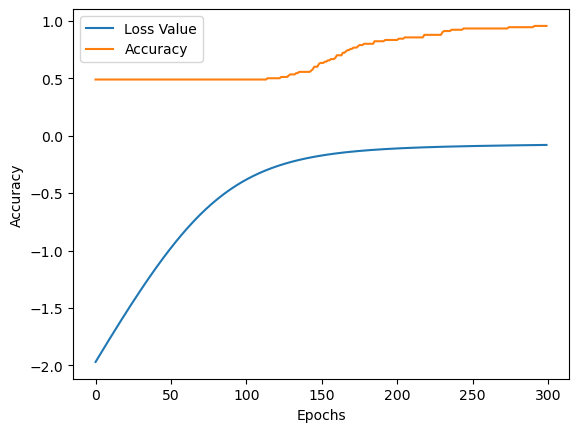

In [164]:
# 画图
loss_val_x_label = np.arange(0, epochs)
loss_val_y_label = loss_val_record
plt.plot(loss_val_x_label, loss_val_y_label, label='Loss Value')  # 添加图例标签
plt.xlabel('Epochs')  # 添加 x 轴标签
plt.ylabel('Loss Value')  # 添加 y 轴标签
plt.legend()  # 显示图例
# plt.show()

acc_x_label = np.arange(0, epochs)
acc_y_label = acc_record
plt.plot(acc_x_label, acc_y_label, label='Accuracy')  # 添加图例标签
plt.xlabel('Epochs')  # 添加 x 轴标签
plt.ylabel('Accuracy')  # 添加 y 轴标签
plt.legend()  # 显示图例
plt.show()
